## Simple Linear Regression

In [1]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [3]:
library('ggplot2')

`geom_smooth()` using formula 'y ~ x'



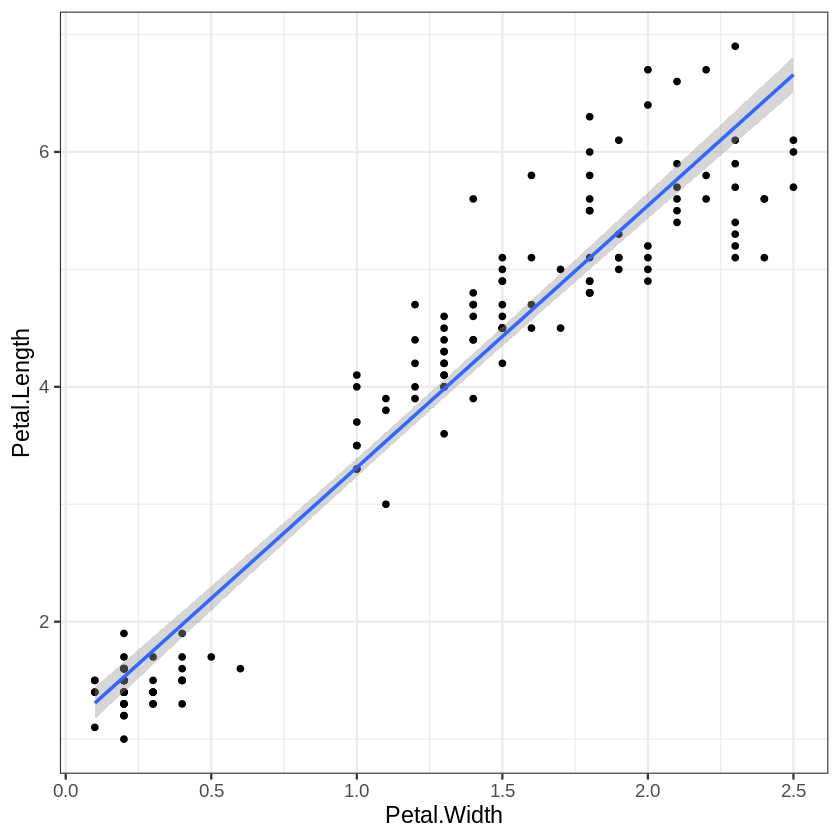

In [5]:
plot <- ggplot(data = iris, aes(x = Petal.Width, y = Petal.Length)) +
        geom_point() + geom_smooth(method = "lm") +
        theme_bw(base_size = 14)
plot

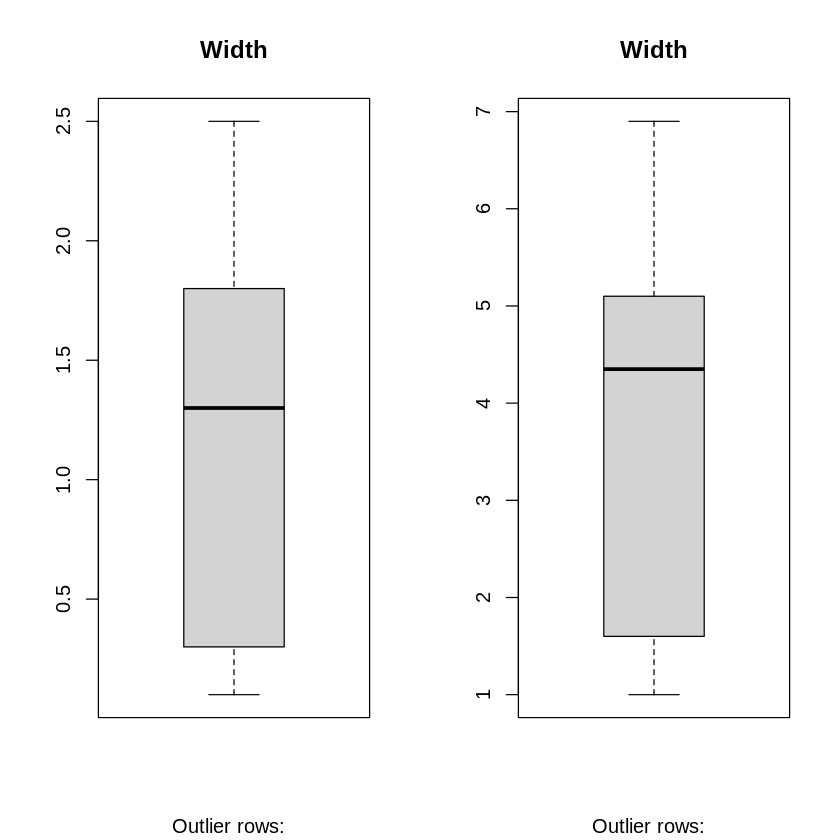

In [8]:
par(mfcol = c(1,2))
boxplot(iris$Petal.Width, main = "Width",
        sub = paste("Outlier rows: ", boxplot.stats(iris$Petal.Width)$out))
boxplot(iris$Petal.Length, main = "Width",
        sub = paste("Outlier rows: ", boxplot.stats(iris$Petal.Length)$out))

In [10]:
boxplot.stats(iris$Petal.Width)$out

numeric(0)

In [11]:
# k có outliers

In [12]:
cor(iris$Petal.Width, iris$Petal.Length)

[1] 0.9628654

In [13]:
# tao train/test
set.seed(42)
trainingRowIndex <- sample(1:nrow(iris), 0.7*nrow(iris))
trainingRowIndex

[1]  49  65  74 146 122 150 128  47  24  71 100  89 110  20 114 111 131  41
 [19] 139  27 109   5  84  34  92 104   3  58  97  42 142  30  43  15  22 123
 [37]   8  36  68  86  18 130 126  69   4  98  50  99  88  87 145  26   6 105
 [55]   2 124  21  96 115  10  40 129  33 140  73  29  76   9  35  16 107  93
 [73] 120 138  80  55  90  94  57 121  77  13  53  54  32  60  85  17  44  83
 [91]  72 135 118 149  48 136  64  38   1 144  14 132  61  81 103

In [16]:
#train data
trainData <- iris[trainingRowIndex, ]
nrow(trainData)

#test
testData <- iris[-trainingRowIndex, ]
nrow(testData)

[1] 45

In [17]:
lmMod <- lm(Petal.Length ~ Petal.Width, data = trainData)
ipred <- predict(lmMod, testData)

In [18]:
mse <- mean(lmMod$residuals^2)
mse

[1] 0.2299794

In [19]:
mse_test <- mean((testData$Petal.Length - ipred)^2)
mse_test

[1] 0.2171714

In [20]:
summary(lmMod)


Call:
lm(formula = Petal.Length ~ Petal.Width, data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3496 -0.2976  0.0076  0.2329  1.4037 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.04175    0.08562   12.17   <2e-16 ***
Petal.Width  2.25325    0.06243   36.09   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4842 on 103 degrees of freedom
Multiple R-squared:  0.9267,	Adjusted R-squared:  0.926 
F-statistic:  1303 on 1 and 103 DF,  p-value: < 2.2e-16


In [21]:
#intercept là b, petal.width là m, Pr có 2 hoặc 3 * là tốt

In [22]:
coef(lmMod)

(Intercept) Petal.Width 
   1.041753    2.253255

In [25]:
beta_width <- coef(lmMod)["Petal.Width"]
beta_width

Petal.Width 
   2.253255

In [27]:
intercept <- coef(lmMod)["(Intercept)"]
intercept

(Intercept) 
   1.041753

In [28]:
# predict new data
x <- c(0.9, 1.5, 2.1)
y <- intercept + beta_width *x

In [29]:
y

[1] 3.069683 4.421636 5.773588

In [30]:
y1 <- predict(lmMod, data.frame(Petal.Width = x))
y1

1        2        3 
3.069683 4.421636 5.773588

In [31]:
print(y1)

       1        2        3 
3.069683 4.421636 5.773588 


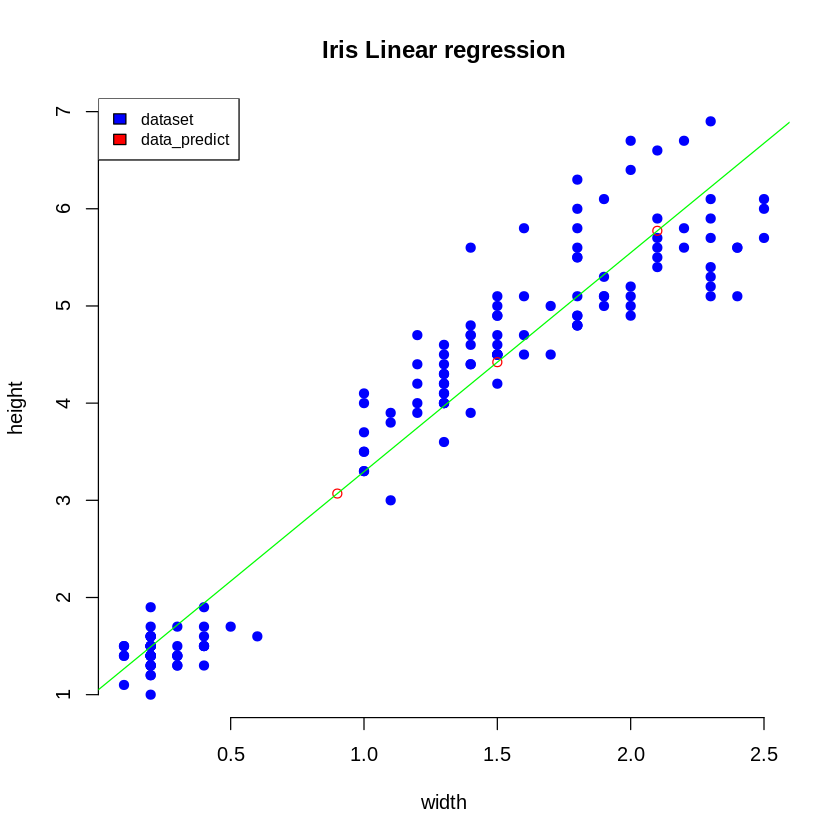

In [32]:
# Visualization
plot(iris$Petal.Width, iris$Petal.Length, 
     main = "Iris Linear regression",
     xlab = "width", ylab = "height",
     pch = 19, frame = FALSE, col= 'blue')
lines(x, y, col= 'red', type='p')
abline(lmMod, iris, col = "green")
legend("topleft", 
       c("dataset", "data_predict"), 
       cex=0.8, 
       fill = c("blue", "red"))


## Multiple Linear Regression

In [3]:
head(mtcars)

input = mtcars[, c('mpg', 'disp', 'hp', 'wt')]
head(input)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


,mpg,disp,hp,wt
,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,160,110,2.620
Mazda RX4 Wag,21.0,160,110,2.875
Datsun 710,22.8,108,93,2.320
Hornet 4 Drive,21.4,258,110,3.215
Hornet Sportabout,18.7,360,175,3.440
Valiant,18.1,225,105,3.460


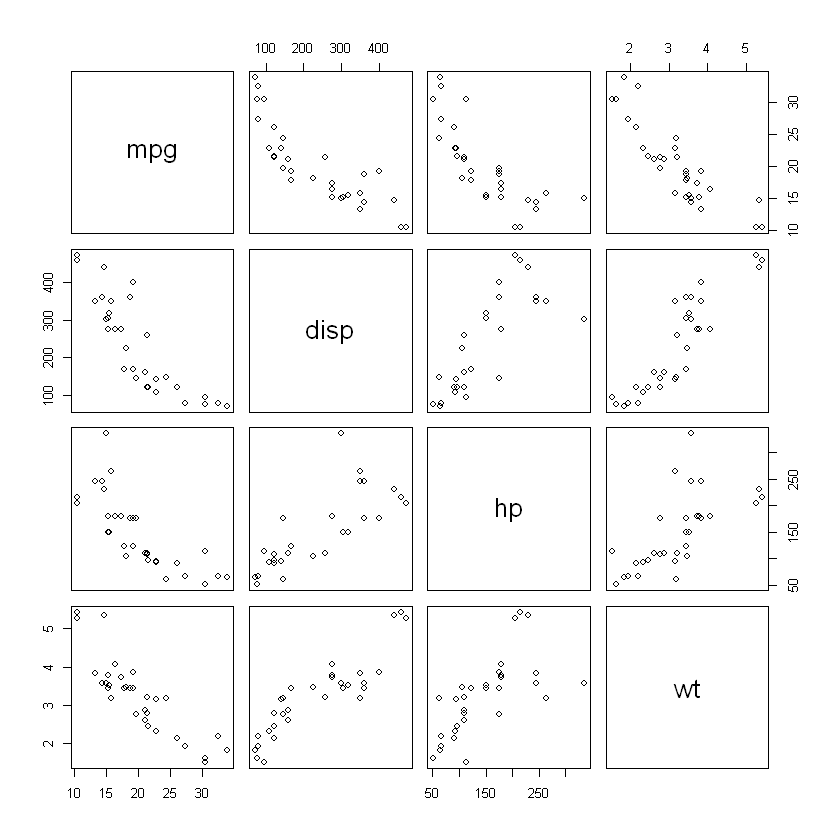

In [4]:
pairs(~mpg + disp + hp + wt, data = input)

In [5]:
print(cor(input$mpg, input$disp))
print(cor(input$mpg, input$hp))
print(cor(input$mpg, input$wt))

[1] -0.8475514
[1] -0.7761684
[1] -0.8676594


In [6]:
# từ biểu đồ và kết quả trên, ta thấy mpg và tất cả các biến còn lại tương quan nghịch

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

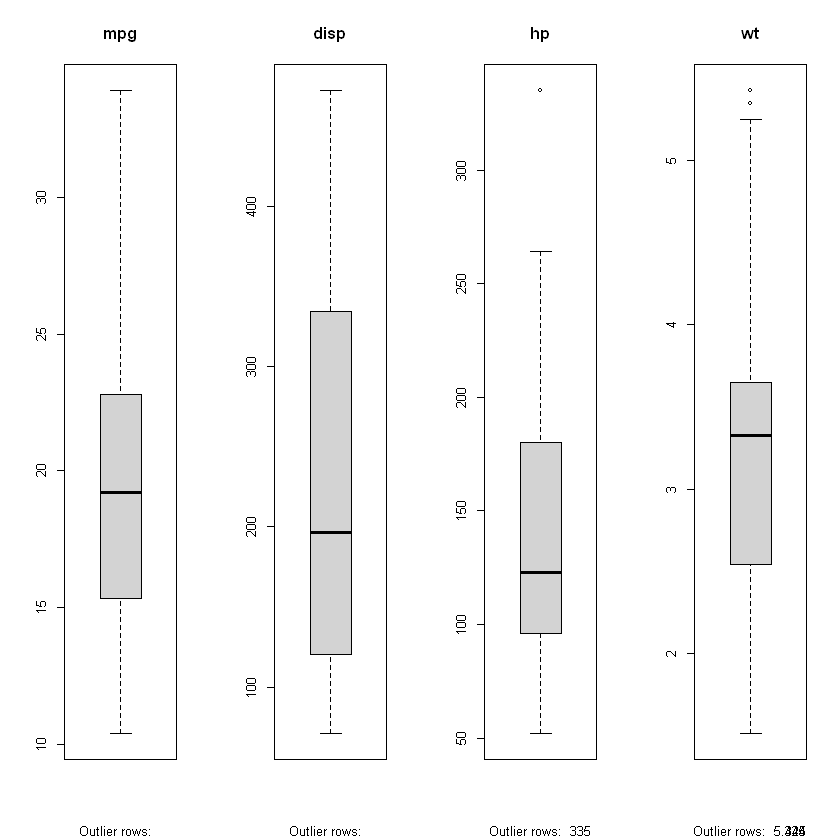

In [8]:
par(mfcol = c(1,4))
boxplot(input$mpg, main = "mpg",
        sub = paste("Outlier rows: ", boxplot.stats(input$mpg)$out))
boxplot(input$disp, main = "disp",
        sub = paste("Outlier rows: ", boxplot.stats(input$disp)$out))
boxplot(input$hp, main = "hp",
        sub = paste("Outlier rows: ", boxplot.stats(input$hp)$out))
boxplot(input$wt, main = "wt",
        sub = paste("Outlier rows: ", boxplot.stats(input$wt)$out))


In [13]:
boxplot.stats(input$hp)$out
boxplot.stats(input$wt)$out



[1] 335

[1] 5.424 5.345

In [19]:
hp_outliers = boxplot.stats(input$hp)$out
wt_outliers = boxplot.stats(input$wt)$out

print('hp_outlier')
print(hp_outliers)
print(paste('num rows', sum(input$hp == hp_outliers)))

print('wt_outlier')
print(wt_outliers)
print(paste('num rows', sum(input$wt %in% wt_outliers)))

# drop outliers
input = input[!(input$hp %in% hp_outliers),]
input = input[!(input$wt %in% wt_outliers),]

print(paste('after drop: ', nrow(input)))

[1] "hp_outlier"
[1] 335
[1] "num rows 1"
[1] "wt_outlier"
[1] 5.424 5.345
[1] "num rows 2"
[1] "after drop:  29"


In [29]:
# tao train/test
set.seed(42)
trainingRowIndex <- sample(1:nrow(input), 0.8*nrow(input))
trainingRowIndex

#train data
trainData <- input[trainingRowIndex, ]
nrow(trainData)

#test
testData <- input[-trainingRowIndex, ]
nrow(testData)

[1] 17  5  1 25 10  4 18 29 15  7 24 28 14 19 26  2  3  9 12 16 23 20 11

[1] 23

[1] 6

In [33]:
lmMod = lm(mpg~disp+hp+wt, data = trainData)
cPred = predict(lmMod, testData)

mse = mean(lmMod$residuals^2)
print('mse')
mse

mse_test = mean((testData$mpg - cPred)^2)
print('mse_test')
mse_test

[1] "mse"


[1] 4.903524

[1] "mse_test"


[1] 4.492823

In [34]:
summary(lmMod)


Call:
lm(formula = mpg ~ disp + hp + wt, data = trainData)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5460 -1.2036 -0.3469  1.2579  5.1846 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.14944    2.34868  17.520 3.48e-13 ***
disp         0.01320    0.01101   1.199 0.245304    
hp          -0.05281    0.02003  -2.637 0.016260 *  
wt          -5.22157    1.22671  -4.257 0.000427 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.436 on 19 degrees of freedom
Multiple R-squared:  0.859,	Adjusted R-squared:  0.8368 
F-statistic:  38.6 on 3 and 19 DF,  p-value: 2.783e-08


In [35]:
# mô hình tạm nhắm mắt mà chấp nhận:)))
# (Intercept), hp, wt đều có * nè

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [40]:
b = coef(lmMod)[1]
mdisp = coef(lmMod)[2]
mhp = coef(lmMod)[3]
mwt = coef(lmMod)[4]

b
mdisp
mhp
mwt

(Intercept) 
   41.14944

disp 
0.013202

hp 
-0.05281201

wt 
-5.221568

In [44]:
# dự đoán:
x1 = 221
x2 = 202
x3 = 2.91

# cách 1
y = (mdisp*x1 + mhp*x2 + mwt*x3 + b)
print(y)

# cách 2
y1 = predict(lmMod, data.frame(disp = x1, hp=x2, wt=x3))
y1

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

   disp 
18.2043 


1 
18.2043

### **Lưu model**

In [46]:
# save model
saveRDS(lmMod, 'lmMode_m.rds')

In [48]:
# load model
lmMode_load = readRDS('lmMode_m.rds')

In [50]:
y2 = predict(lmMode_load, data.frame(disp = 1, hp = 2, wt = 3))
y2

1 
25.39232

## **Model Selection**

In [51]:
## Model Selection
library('BMA') # bayesian model average

Loading required package: survival

Loading required package: leaps

Loading required package: robustbase


Attaching package: 'robustbase'


The following object is masked from 'package:survival':

    heart


Loading required package: inline

Loading required package: rrcov

Scalable Robust Estimators with High Breakdown Point (version 1.6-2)




In [52]:
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [53]:
cols = colnames(mtcars)
cols

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

In [55]:
# features selection
yvar = mtcars[, ('mpg')] # biến target
xvars = mtcars[, cols[-1]] # biến predict

bma = bicreg(xvars, yvar, strict = F, OR = 2)
bma


Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 2)


 Posterior probabilities(%): 
  cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb 
 37.9   0.0  31.5   0.0 100.0  45.2   0.0  28.8   0.0   0.0 

 Coefficient posterior expected values: 
(Intercept)          cyl         disp           hp         drat           wt  
  27.211564    -0.489171     0.000000    -0.008011     0.000000    -3.816159  
       qsec           vs           am         gear         carb  
   0.505065     0.000000     0.845872     0.000000     0.000000  

In [57]:
# nhìn chung thì drat, vs, am, gear, carb 
# là các features ko có giá trị trong model

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

In [59]:
print(summary(bma))


Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 2)


  5  models were selected
 Best  5  models (cumulative posterior probability =  1 ): 

           p!=0    EV        SD        model 1    model 2    model 3  
Intercept  100.0  27.211564  13.82229    9.61778   39.68626   37.22727
cyl         37.9  -0.489171   0.71049      .       -1.50779      .    
disp         0.0   0.000000   0.00000      .          .          .    
hp          31.5  -0.008011   0.01373      .          .       -0.03177
drat         0.0   0.000000   0.00000      .          .          .    
wt         100.0  -3.816159   0.93260   -3.91650   -3.19097   -3.87783
qsec        45.2   0.505065   0.59539    1.22589      .          .    
vs           0.0   0.000000   0.00000      .          .          .    
am          28.8   0.845872   1.53016    2.93584      .          .    
gear         0.0   0.000000   0.00000      .          .          .    
carb         0.0   0.000000   0.00000      .          .          .    
    

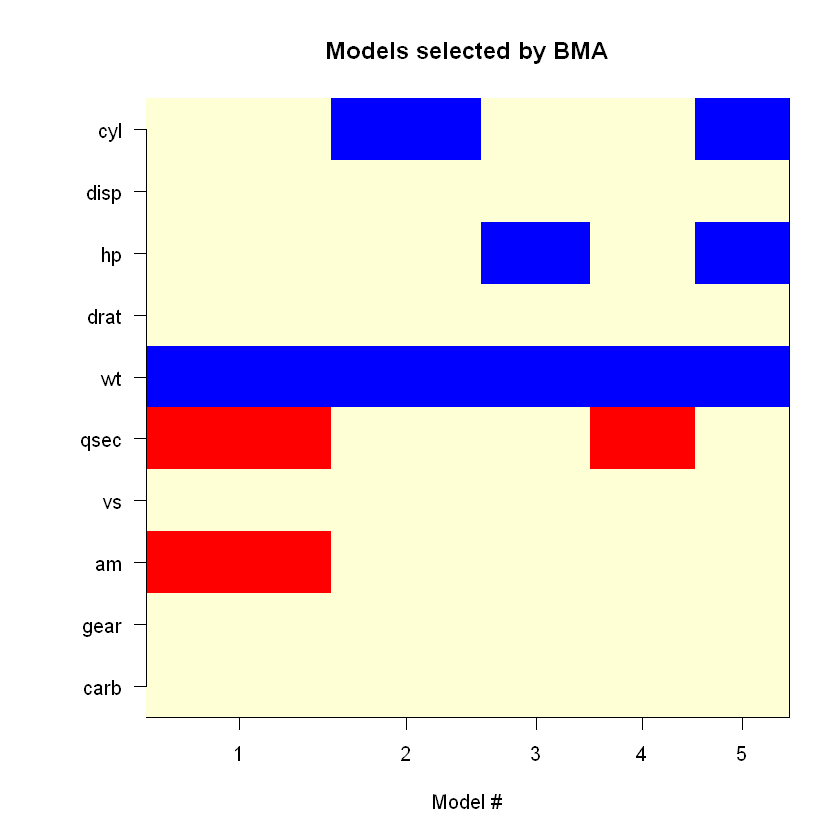

In [60]:
imageplot.bma(bma)

In [ ]:
# => có thể chọn model 1

In [61]:
# trong số các biến đã chọn cho model, biến nào là quan trọng nhất:
library('relaimpo')

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windowsLoading required package: MASS

Loading required package: boot


Attaching package: 'boot'


The following object is masked from 'package:robustbase':

    salinity


The following object is masked from 'package:survival':

    aml


Loading required package: survey

Loading required package: grid

Loading required package: Matrix


Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart


Loading required package: mitools

This is the global version of package relaimpo.


If you are a non-US user, a version with the interesting additional metric pmvd is available


from Ulrike Groempings web site at pr

In [62]:
# trong số các biến đã chọn cho model, biến nào là quan trọng nhất:
m = lm(mpg~wt+qsec+am, data = mtcars)
calc.relimp(m, type = 'lmg', rela=T, rank=T)

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

Response variable: mpg 
Total response variance: 36.3241 
Analysis based on 32 observations 

3 Regressors: 
wt qsec am 
Proportion of variance explained by model: 84.97%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

           lmg
wt   0.5640407
qsec 0.1853428
am   0.2506165

Average coefficients for different model sizes: 

            1X       2Xs       3Xs
wt   -5.344472 -5.200397 -3.916504
qsec  1.412125  1.455534  1.225886
am    7.244939  4.426358  2.935837